##### Capstone Project #2 – Recommendation System for movies 


Dataset :

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. 
This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website. 


Let us explore the data.

In [1]:
#importing all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import plotly
import ast
from scipy.stats import pearsonr
from IPython.display import Image, HTML

In [2]:
movie_MetaData = pd.read_csv("movies_metadata.csv")
movie_MetaData.head()

C:\Users\Lasya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movie_MetaData.shape

(45466, 24)

The dataset has record of 45466 movies with 24 columns(features). Let us look closer into the features.

In [4]:
movie_MetaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

Removing the features with more than 50% of its data with null values

In [5]:
movie_MetaData = movie_MetaData.drop(['homepage'], axis=1)

In [6]:
movie_MetaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 23 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  20412 non-null obje

As revenue is the feature which I am interested in, I checked if there are any Nan values in that column.

In [7]:
movie_MetaData['revenue'].value_counts(dropna=False)

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6864, dtype: int64

We see that the 38052 of the movies have a recorded revenue of 0. This indicates that we do not have valueble information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an important feature going forward from the remaining 7414 movies.

In [8]:
movie_MetaData['revenue'] = movie_MetaData['revenue'].replace(0, np.nan)

The budget feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN.

In [9]:
movie_MetaData['budget'].value_counts(dropna=False)

0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
3910000         1
891000          1
5579750         1
704460          1
7075038         1
Name: budget, Length: 1226, dtype: int64

In [10]:
movie_MetaData['budget'] = pd.to_numeric(movie_MetaData['budget'], errors='coerce')
movie_MetaData['budget'] = movie_MetaData['budget'].replace(0, np.nan)

In [11]:
movie_MetaData['budget'].value_counts(dropna=False)

NaN           36576
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
              ...  
4490331.0         1
313411.0          1
1020000.0         1
37.0              1
9500.0            1
Name: budget, Length: 1223, dtype: int64

Extracting feature "Release Year"  from "Release Date." Release_year is the year in which the movie was released.


In [12]:
from datetime import datetime
movie_MetaData['release_date'] = pd.to_datetime(movie_MetaData['release_date'], errors='coerce')
movie_MetaData['year'] = pd.DatetimeIndex(movie_MetaData['release_date']).year
movie_MetaData.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


I am calculating the Net Profit/Loss using features "Revenue" and "budget."
This feature is incredibly insightful as it will give us a more accurate picture of a movie's financial success. Presently, our data will not judge if a 200 million budget movie that earned 100 million did better than a 50,000 budget movie taking in 200,000. This feature will be able to capture that information. A  value > 1 would indicate profit, whereas a return value < 1 would indicate a loss.

In [13]:
movie_MetaData['Net Profit/Loss'] = movie_MetaData['revenue'] / movie_MetaData['budget']
movie_MetaData['Net Profit/Loss'].value_counts(dropna=False)

NaN         40085
1.000000       20
2.000000       12
4.000000       11
5.000000        8
            ...  
2.076607        1
1.431323        1
0.009587        1
0.550348        1
1.804007        1
Name: Net Profit/Loss, Length: 5232, dtype: int64

There are few features like adult, id, original_title, poster_path,video which doesnot provide useful information. Dropping these features from dataframe.


In [14]:
movie_MetaData = movie_MetaData.drop(['adult','original_title','poster_path','video'], axis=1)
movie_MetaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
belongs_to_collection    4494 non-null object
budget                   8890 non-null float64
genres                   45466 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null datetime64[ns]
revenue                  7408 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  20412 non-null object
title                    45460 non-null object
vote_average             45460 non-null float64
vote_count               45460 non-n

In [15]:
movie_MetaData.head()

,belongs_to_collection,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,Net Profit/Loss
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995.0,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,NaN
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,NaN


In [16]:
movie_MetaData.to_csv("movie_MetaData_cleanData.csv",index=None)

By exploring Movie meta data we would try to answer below questions.

1. which Production companies make most money in movie business?
2. Which movies are more popular?
3. Which movies have been most voted by TMBD voters?
4. which movies are most Critically Acclaimed?
5. Does Release Month play a significant role in determining the success and the revenue generated by a particular movie?
6. Which are the most expensive movies of all time?
7. How strong a correlation does the budget hold with the revenue?
8. which are Highest Grossing Films of All Time?
9. Which are the least and the most successful movies of all time?

 


Let us find out which production companies have earned the most money from the movie making business.

In [17]:
movie_MetaData['production_companies'] = movie_MetaData['production_companies'].fillna('[]').apply(ast.literal_eval)
movie_MetaData['production_companies'] = movie_MetaData['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [18]:
movie_MetaData['production_companies'].value_counts(dropna=False)

[]                                               11881
[Metro-Goldwyn-Mayer (MGM)]                        742
[Warner Bros.]                                     540
[Paramount Pictures]                               505
[Twentieth Century Fox Film Corporation]           439
                                                 ...  
[Stéphan Films, Filmédis, Planet-Film Berlin]        1
[Ibérica Filmes]                                     1
[Prism Entertainment Corporation]                    1
[Herman Wobber]                                      1
[Minutehand Pictures]                                1
Name: production_companies, Length: 22672, dtype: int64

In [19]:
companies_list = movie_MetaData.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
companies_list.name = 'companies'

In [20]:
production_companies_DF = movie_MetaData.drop('production_companies', axis=1).join(companies_list)

In [21]:
production_companies_sum = pd.DataFrame(production_companies_DF.groupby('companies')['revenue'].sum().sort_values(ascending=False))
production_companies_sum.columns = ['Total Revenue']
production_companies_mean = pd.DataFrame(production_companies_DF.groupby('companies')['revenue'].mean().sort_values(ascending=False))
production_companies_mean.columns = ['Average Revenue']
production_companies_count = pd.DataFrame(production_companies_DF.groupby('companies')['revenue'].count().sort_values(ascending=False))
production_companies_count.columns = ['Number Of Movies']

production_companies_DF = pd.concat((production_companies_sum, production_companies_mean, production_companies_count), axis=1)

C:\Users\Lasya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [22]:
production_companies_DF.sort_values('Total Revenue', ascending=False).head(10)

,Total Revenue,Average Revenue,Number Of Movies
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


Warner Bros is the highest-earning production company of all time, earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramount Pictures are the second and the third highest-earning companies with 55 billion dollars and 48 billion dollars in revenue.

As we are aware Warner Bros and Universal Pictures are bigger studios comapred to others in the list. Thus it would be more appropriate to look at average revenue of studios. We will consider studtios which has produced at least 10 movies.

In [23]:
production_companies_DF[production_companies_DF['Number Of Movies'] >= 10].sort_values('Average Revenue', ascending=False).head(10)

,Total Revenue,Average Revenue,Number Of Movies
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Heyday Films,7.920012e+09,6.092317e+08,13
WingNut Films,7.111004e+09,5.470003e+08,13
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Syncopy,5.359856e+09,5.359856e+08,10
Fuji Television Network,5.880444e+09,4.900370e+08,12
Blue Sky Studios,5.274028e+09,4.794570e+08,11
Walt Disney Animation Studios,6.053112e+09,4.656240e+08,13
Lucasfilm,9.898421e+09,4.499282e+08,22


Pixar Animation Studios has produced the most successful movies, on average. This is no surprise, though Pixar has made just 18 movies. It includes the Toy Story Franchise, Up, Finding Nemo, Inside Out, Wall-E, Ratatouille,  Cars Franchise, Incredibles, etc., which has been well received by the audience across the world as well as critically acclaimed. Marvel Studios, with an average gross of 615 million dollars, comes in second. 

In [24]:
movie_MetaData.head()

,belongs_to_collection,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,Net Profit/Loss
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,[Pixar Animation Studios],"[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995.0,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,NaN
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[Twentieth Century Fox Film Corporation],"[{'iso_3166_1': 'US', 'name': 'United States o...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,"[Sandollar Productions, Touchstone Pictures]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,NaN


To answer questions like Which movies are more popular? and Which moves have been most voted by TMBD voters? we need to look at features popularity, vote_count and vote_average.As these features are of type object I converted them to float type.

First, let us find the answer to Which movies are the most popular?

In [25]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [26]:
movie_MetaData['popularity'] = movie_MetaData['popularity'].apply(clean_numeric).astype('float')
movie_MetaData['vote_count'] = movie_MetaData['vote_count'].apply(clean_numeric).astype('float')
movie_MetaData['vote_average'] = movie_MetaData['vote_average'].apply(clean_numeric).astype('float')

In [27]:
movie_MetaData[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015.0
33356,Wonder Woman,294.337037,2017.0
42222,Beauty and the Beast,287.253654,2017.0
43644,Baby Driver,228.032744,2017.0
24455,Big Hero 6,213.849907,2014.0
26564,Deadpool,187.860492,2016.0
26566,Guardians of the Galaxy Vol. 2,185.330992,2017.0
14551,Avatar,185.070892,2009.0
24351,John Wick,183.870374,2014.0
23675,Gone Girl,154.801009,2014.0


Minions are the most popular movie by the TMDB Popularity Score. I guess no arguing about liking cute minions. It is also interesting to note that the title characters Minions talks less few words in the whole movie and yet most popular. Wonder Woman and Beauty and the Beast come in second and third respectively, both of which are women centric stories almost tieing up for the second place.

Now that we know which movies are most popular, let us see which movies people most voted on in TMBD.

In [28]:
movie_MetaData[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010.0
12481,The Dark Knight,12269.0,2008.0
14551,Avatar,12114.0,2009.0
17818,The Avengers,12000.0,2012.0
26564,Deadpool,11444.0,2016.0
22879,Interstellar,11187.0,2014.0
20051,Django Unchained,10297.0,2012.0
23753,Guardians of the Galaxy,10014.0,2014.0
2843,Fight Club,9678.0,1999.0
18244,The Hunger Games,9634.0,2012.0


Inception and The Dark Knight, two critically acclaimed movies are at the top of our chart. It is ineteresting to note that both of these were directed by Christopher Nolan.

Let us check what the most critically acclaimed movies as per TMDB are. We will only consider those movies that have more than 5000 votes (similar to IMDB's criteria of 5000 votes in selecting its top 250).

In [29]:
movie_MetaData[movie_MetaData['vote_count'] > 5000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994.0
834,The Godfather,8.5,6024.0,1972.0
292,Pulp Fiction,8.3,8670.0,1994.0
12481,The Dark Knight,8.3,12269.0,2008.0
2843,Fight Club,8.3,9678.0,1999.0
18465,The Intouchables,8.2,5410.0,2011.0
351,Forrest Gump,8.2,8147.0,1994.0
1154,The Empire Strikes Back,8.2,5998.0,1980.0
256,Star Wars,8.1,6778.0,1977.0
46,Se7en,8.1,5915.0,1995.0


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. The Academy Awards is going to agree with me on this.

Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation between these two quanitties?

In [30]:
movie_MetaData.drop(movie_MetaData[movie_MetaData['vote_average'].isnull()].index,inplace = True)

In [31]:
# Convert dataframe into series 
popularity = movie_MetaData['popularity']
vote_average = movie_MetaData['vote_average']

# Apply the pearsonr() 
r, p = stats.pearsonr(vote_average,popularity) 
print('Pearsons correlation: %.3f' % r)
print('p-value: %.3f' %p)

Pearsons correlation: 0.154
p-value: 0.000


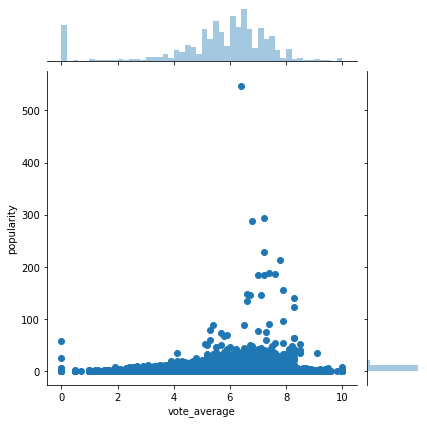

In [32]:
sns.jointplot(x='vote_average', y='popularity', data=movie_MetaData)

Surprisingly, the Pearson Coefficient of the two quantities, as mentioned earlier, is 0.154, suggesting no definite correlation. In other words, popularity and vote average and independent quantities.

Release Dates can often play a significant role in determining the success and the revenue generated by a particular movie. This section will try and gain insights about release dates in terms of  months.
We have already constructed the year feature in our preliminary data wrangling step. Let us now extract the month for each movie with a release date.

In [33]:
movie_MetaData['month'] = pd.DatetimeIndex(movie_MetaData['release_date']).month

In [34]:
month_order = {1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'Apr', 5.0:'May', 6.0:'Jun', 7.0:'Jul', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}

In [35]:
month_data = movie_MetaData['month'].map(month_order)

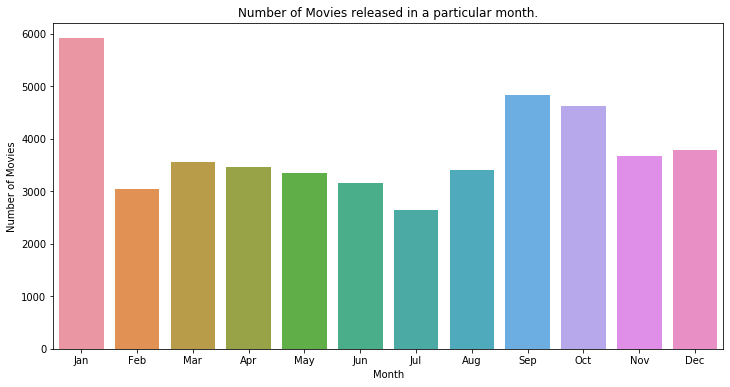

In [36]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x=month_data, data=movie_MetaData, order=month_order.values())
plt.ylabel('Number of Movies')
plt.xlabel('Month')
plt.show()

It appears that January is the most popular month when it comes to movie releases. In Hollywood circles, this is also known as the dump month when sub-par movies are released by the dozen.

In [37]:
movie_MetaData['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

The mean budget of a film is 21.6 million dollars whereas the median budget is far smaller at 8 million dollars. This strongly suggests the mean being influenced by outliers.

In [38]:
movie_MetaData['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

The mean gross of a movie is 68.7 million dollars, whereas the median gross is much lower at 16.8 million dollars, suggesting the skewed nature of revenue. The most insufficient revenue generated by a movie is just 1 dollar, whereas the highest-grossing film of all time has raked in an astonishing *2.78 billion dollars.

let us take a look at the most expensive movies of all time and the revenue & returns that they generated.

In [39]:
movie_MetaData[movie_MetaData['budget'].notnull()][['title', 'budget', 'revenue', 'Net Profit/Loss', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,Net Profit/Loss,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011.0
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007.0
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006.0
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017.0
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010.0
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012.0
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007.0
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013.0
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013.0


Two Pirates of the Carribean films occupy the top spots in this list with a staggering budget of over 300 million dollars. All the top 10 most expensive films made a profit on their investment except for The Lone Ranger which managed to recoup less than 35% of its investment, taking in a paltry 90 million dollars on a 255 million dollar budget.

How strong a correlation does the budget hold with the revenue? A stronger correlation would directly imply more accurate forecasts.

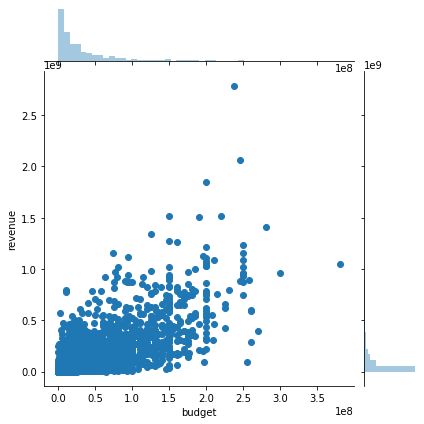

In [40]:
sns.jointplot(x='budget',y='revenue',data=movie_MetaData[movie_MetaData['Net Profit/Loss'].notnull()])

The scatterplot above shows a positive corelation between budget and revenue.

Let us see which are Highest Grossing Films of All Time?

In [41]:
gross_top = movie_MetaData[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,title,budget,revenue,year
14551,Avatar,237000000.0,2.787965e+09,2009.0
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015.0
1639,Titanic,200000000.0,1.845034e+09,1997.0
17818,The Avengers,220000000.0,1.519558e+09,2012.0
25084,Jurassic World,150000000.0,1.513529e+09,2015.0
28830,Furious 7,190000000.0,1.506249e+09,2015.0
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015.0
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011.0
22110,Frozen,150000000.0,1.274219e+09,2013.0
42222,Beauty and the Beast,160000000.0,1.262886e+09,2017.0


The world of movies broke the 1 billion dollar mark in 1997 with the release of Titanic. It took another 12 years to break the 2 billion dollar mark with Avatar. Both these movies were directed by James Cameron.

HIghest grossing movie does not necessarily mean movie made highest profit of all.Let us just check the least and the most successful movies of all time. To do this, we will only consider those movies which have a budget greater than 5 million dollars.

In [42]:
movie_MetaData[(movie_MetaData['Net Profit/Loss'].notnull()) & (movie_MetaData['budget'] > 5e6)][['title', 'budget', 'revenue', 'Net Profit/Loss', 'year']].sort_values('Net Profit/Loss', ascending=False).head(10)

,title,budget,revenue,Net Profit/Loss,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982.0
256,Star Wars,11000000.0,775398007.0,70.490728,1977.0
1338,Jaws,7000000.0,470654000.0,67.236286,1975.0
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973.0
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994.0
834,The Godfather,6000000.0,245066411.0,40.844402,1972.0
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989.0
24258,Annabelle,6500000.0,255273813.0,39.272894,2014.0
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987.0
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965.0


In [43]:
movie_MetaData[(movie_MetaData['Net Profit/Loss'].notnull()) & (movie_MetaData['budget'] > 5e6) & (movie_MetaData['revenue'] > 10000)][['title', 'budget', 'revenue', 'Net Profit/Loss', 'year']].sort_values('Net Profit/Loss').head(10)

,title,budget,revenue,Net Profit/Loss,year
11159,Chaos,20000000.0,10289.0,0.000514,2005.0
19027,5 Days of War,20000000.0,17479.0,0.000874,2011.0
21034,Special Forces,10000000.0,10759.0,0.001076,2011.0
25732,Foodfight!,65000000.0,73706.0,0.001134,2012.0
38388,Term Life,16500000.0,21256.0,0.001288,2016.0
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012.0
12038,The Good Night,15000000.0,20380.0,0.001359,2007.0
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987.0
22097,Twice Born,13000000.0,18295.0,0.001407,2012.0
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001.0


 Let us now have a look at the most commonly occuring genres in movies.

In [44]:
movie_MetaData['genres'] = movie_MetaData['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [45]:
genre_list = movie_MetaData.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre_list.name = 'genre'
genre_list

0        Animation
0           Comedy
0           Family
1        Adventure
1          Fantasy
           ...    
45461       Family
45462        Drama
45463       Action
45463        Drama
45463     Thriller
Name: genre, Length: 91085, dtype: object

In [46]:
gen_df = movie_MetaData.drop('genres', axis=1).join(genre_list)

In [47]:
gen_df['genre'].value_counts().shape[0]

20

TMDB defines 32 different genres for our set of 45,000 movies. 

In [48]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20264
1,Comedy,13182
2,Thriller,7623
3,Romance,6735
4,Action,6594
5,Horror,4672
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3047


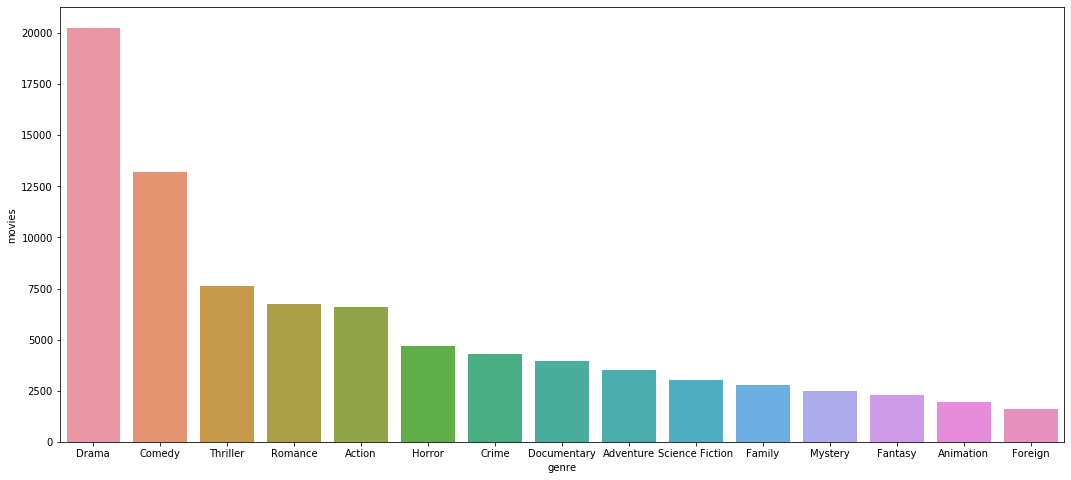

In [49]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

Let us further see if some genres are particularly more successful than others. We expect Science Fiction and Fantasy Movies to bring in more revenue than other genres but when normalized with their budget, do they prove to be as successful? 

In [50]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime','Adventure','Science Fiction','Family','Mystery', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

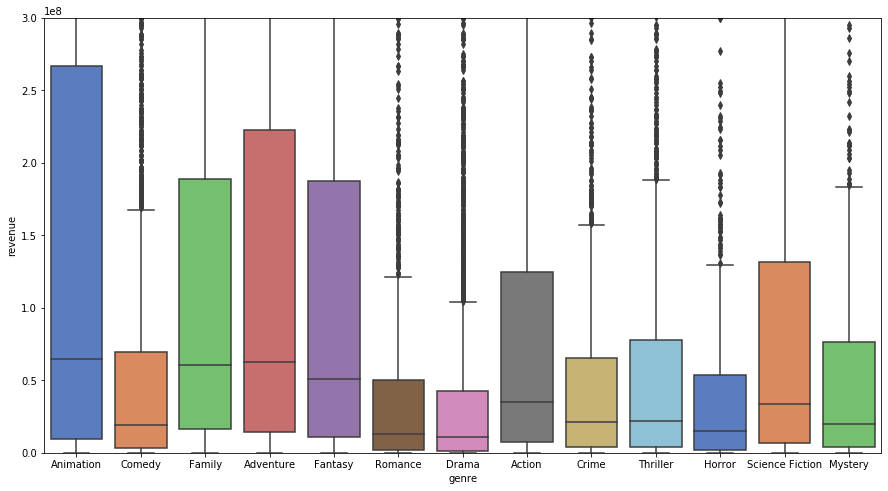

In [51]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

Animation movies has the largest 25-75 range as well as the median revenue among all the genres plotted. Family and Adventure have the second and third highest median revenue respectively. It is sureal to know that Romance and Drama has lowest median revenue comapred to other genre.

<Figure size 1296x576 with 0 Axes>

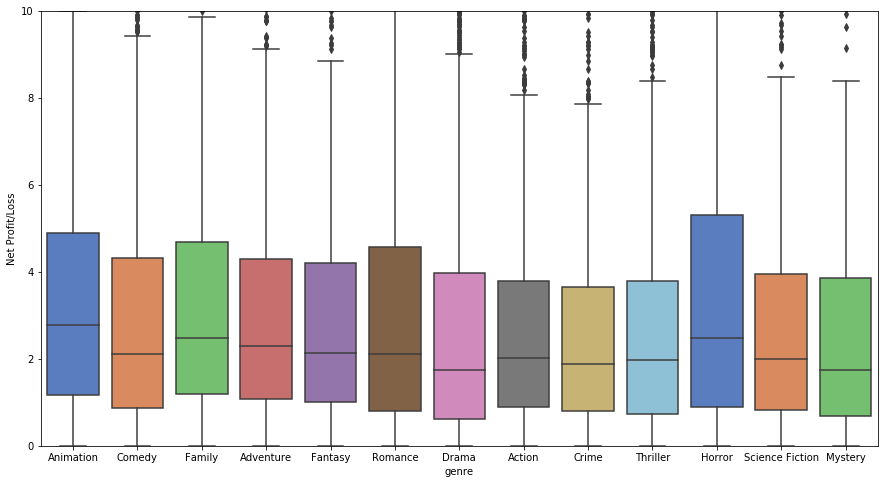

In [52]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='Net Profit/Loss', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

From the boxplot, it seems like Animation Movies tend to yield the highest returns on average. Horror Movies also tend to be a good yield .

In [53]:
movie_MetaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 22 columns):
belongs_to_collection    4490 non-null object
budget                   8890 non-null float64
genres                   45460 non-null object
id                       45460 non-null object
imdb_id                  45443 non-null object
original_language        45449 non-null object
overview                 44506 non-null object
popularity               45460 non-null float64
production_companies     45460 non-null object
production_countries     45460 non-null object
release_date             45376 non-null datetime64[ns]
revenue                  7408 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  20412 non-null object
title                    45460 non-null object
vote_average             45460 non-null float64
vote_count               45460 non-

In [54]:
movie_MetaData.to_csv("movie_MetaData_cleanData.csv",index=None)